In [1]:
import glob
import pandas as pd
def get_log_props(log_path):
    parts = log_path.split('-')
    if len(parts) > 5:
        topic = parts[1]
        depth = parts[2].split('user')[-1]
        modality = parts[3]
        strat = parts[4]
        prob = parts[5].split(".")[0]

        return (topic, depth, modality, strat, prob)
    else:
        return 


corpus = "wapo"

log_root_path = "workspace/sims/output/"
#load all logs
log_files = glob.glob(f"{log_root_path}{corpus}*.log")
topics = set()
depths = set()
modalities  = set()
strats = set()
probs = set()

log_cnt = 0

log_df = pd.DataFrame(columns=['Depth', 'Modality', 'Strat', 'Probability', 'Topics'])

for path in log_files:
    res = get_log_props(path)

    if res:
        log_cnt +=1
        topic, depth, modality, strat, prob = res
        topics.add(topic)
        depths.add(depth)
        modalities.add(modality)
        strats.add(strat)
        probs.add(prob)

        row = {'Depth' : depth, 'Modality': modality, 'Strat' : strat, 'Probability' : prob,  'Topics' : topic}
        log_df = pd.concat([log_df, pd.DataFrame([row])])


print(f"number of log files: {log_cnt}")


number of log files: 1050


In [ ]:
log_files

In [ ]:
log_files

In [81]:
len(log_files)

150

# Evaluations

## Modalities

### sDCG 

In [2]:
topics = list(set([int(log.split('-')[2]) for log in log_files]))

In [3]:
topics_to_analyze = topics

### Effort vs. Effect

## Depth evaluation

### sDCG

### Effort vs. Effect

In [4]:
topics_to_analyze

[815,
 646,
 393,
 816,
 397,
 400,
 408,
 819,
 414,
 801,
 802,
 803,
 804,
 805,
 422,
 807,
 806,
 809,
 426,
 427,
 811,
 812,
 810,
 813,
 814,
 433,
 690,
 818,
 820,
 821,
 817,
 439,
 824,
 825,
 442,
 823,
 822,
 445,
 321,
 336,
 341,
 347,
 350,
 808,
 362,
 363,
 367,
 626,
 375,
 378]

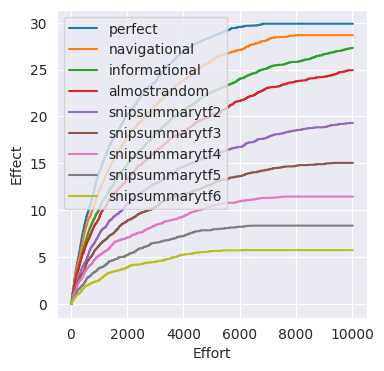

In [6]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')


qrels_path = f"workspace/data/{corpus}/{corpus}_qrels"


qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

depth_eval = {}
gain_all = {}


modality = 'PageTitle'
query_types = {'d2qNofeedback', 'd2qfeedback', 'gpt'}
query_type = 'd2qfeedback'

#feed = ["_nofeedback", "_feedback"]
feed = ["_feedback"]

q_strats = ['GPT+', "D2Q", "D2Q+", "D2Q++", 'GPT']
snippets = ["perfect", "navigational", "informational", "almostrandom", "snipsummarytf2", "snipsummarytf3", "snipsummarytf4", "snipsummarytf5", "snipsummarytf6"]

stop_decs = ['10rpp', 't50nr', 't100nr', 't150nr']

models = ['bm25', 'monoT5']

depths = snippets

for depth in depths:

    for topic in topics_to_analyze:
        
        log_path = log_root_path + f"{corpus}" +"-"+ models[0] + "-" + str(topic) + "-" + depth + "-"+ snippets[0] + "-"  +  stop_decs[0]+".log"
        query_logs = {}
                    
        query = ''
        results = []
        
        _gain = 0
        gain = {}                
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')
                
                if len(logs) > 4 and logs[0] == 'ACTION':

                    if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                        result = logs[-1].replace("b'", "").replace("'", "").strip('\n')
                        if qrels.get((str(topic),result)):
                            _gain += int(qrels.get((str(topic),result)))
                    if True or int(logs[3]) < 300:
                        gain[int(logs[3])] = _gain
        gain_all[topic] = gain
    depth_eval[depth] = pd.DataFrame.from_dict(gain_all).sort_index().fillna(method='ffill').T.mean().to_dict()
pd.DataFrame.from_dict(depth_eval).sort_index().fillna(method='ffill').plot(xlabel='Effort', ylabel='Effect', figsize=(4,4))

#ax = plt.gcf().axes[0]
#lines = ax.get_lines()
#for line in lines:
#    print(line.get_color())
    

#lines[0].set_color("#d62728") 
#lines[3].set_color("#1f77b4") 

#plt.legend()

#plt.savefig(f'/workspace/figures/effort.effect.snippet.{corpus}.pdf', bbox_inches="tight")
plt.show()

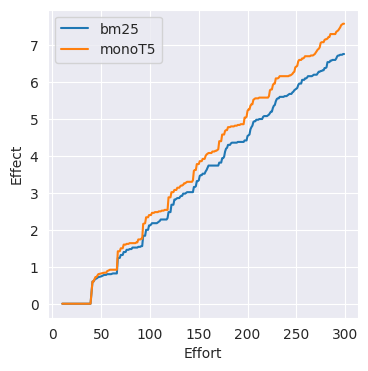

In [55]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')



qrels_path = f"workspace/data/{corpus}/{corpus}_qrels"


qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

depth_eval = {}
gain_all = {}

depths = ['bm25', 'monoT5']


modality = 'PageTitle'
query_types = {'d2qNofeedback', 'd2qfeedback', 'gpt'}
query_type = 'd2qfeedback'
probabilities = 'rprob10nprob00'

#feed = ["_nofeedback", "_feedback"]
feed = ["_feedback"]

q_strat = [ "GPT+", "justfirst"]

for depth in depths:

    for topic in topics_to_analyze:
        
        log_path = log_root_path + f"{corpus}-" + depth +"-" + str(topic) + "-" + q_strat[0]+ "-perfect-"+  "10rpp.log"
        query_logs = {}
                    
        query = ''
        results = []
        
        _gain = 0
        gain = {}                
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')
                
                if len(logs) > 4 and logs[0] == 'ACTION':

                    if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                        result = logs[-1].replace("b'", "").replace("'", "").strip('\n')
                        if qrels.get((str(topic),result)):
                            _gain += int(qrels.get((str(topic),result)))
                    if int(logs[3]) < 300:
                        gain[int(logs[3])] = _gain
        gain_all[topic] = gain
    depth_eval[depth] = pd.DataFrame.from_dict(gain_all).sort_index().fillna(method='ffill').T.mean().to_dict()
pd.DataFrame.from_dict(depth_eval).sort_index().fillna(method='ffill').plot(xlabel='Effort', ylabel='Effect', figsize=(4,4))

#ax = plt.gcf().axes[0]
#lines = ax.get_lines()
#for line in lines:
#    print(line.get_color())
    

#lines[0].set_color("#d62728") 
#lines[3].set_color("#1f77b4") 

#plt.legend()

#plt.savefig(f'figures/effort.effect.depth.{query_type}.pdf', bbox_inches="tight")
plt.show()

## Browsing behavior

### sDCG

dict_keys(['rprob10nprob00', 'rprob09nprob03', 'rprob08nprob03', 'rprob07nprob03', 'rprob06nprob03', 'rprob05nprob05'])


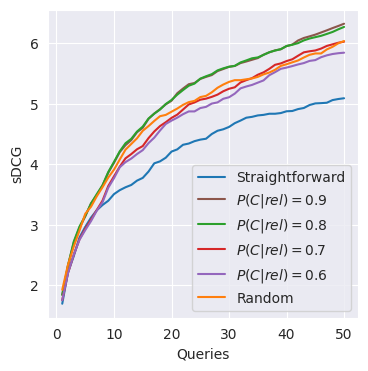

In [93]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')


def dcg(results, topic):
    _dcg = 0
    for i,result in enumerate(results):
        _doc = qrels.get((str(topic),result))
        
        if _doc is not None:
            _dcg += int(_doc) / (1 + math.log(i+1, b))

    return _dcg

b = 2
bq = 4

qrels_path = 'wtr/queries_qrels/rel_table_qrels.txt'
qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

prob_eval = {}
sdcg_eval = {}

depth = 10
query_types = {'d2qNofeedback', 'd2qfeedback', 'gpt'}
query_type = 'd2qfeedback'
probabilities = ['rprob10nprob00','rprob09nprob03', 'rprob08nprob03', 'rprob07nprob03', 'rprob06nprob03', 'rprob05nprob05']

for probability in probabilities:

    if probability == 'rprob05nprob05':
        modality = 'random' 
    else:
        modality = 'PageTitle'

    for topic in topics_to_analyze:
        
        log_path = log_root_path +"wtr_sim-" + str(topic) + "-fixeddepthuser" + str(depth) + '-' + modality + "-" + query_type + "-" + probability + ".log"
        
        query_logs = {}
                    
        query = ''
        results = []
                        
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')

                if logs[1] == 'QUERY':
                    if len(query) > 0:
                        query_logs[query] = results
                    results = []
                    query = ' '.join(logs[4:]).strip('\n')
                    
                if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                    results.append(logs[-1].replace("b'", "").replace("'", "").strip('\n'))      

        sdcg = {}
        _sdcg = 0.0

        for q, query in enumerate(query_logs.keys()):
            results = query_logs.get(query)    
            _sdcg += dcg(results, topic) / (1 + math.log(q + 1, bq))
            sdcg[q+1] = _sdcg
            
        sdcg_eval[topic] = sdcg
    prob_eval[probability] = pd.DataFrame.from_dict(sdcg_eval)[:50].T.mean().to_dict()



pd.DataFrame.from_dict(prob_eval).plot(xlabel='Queries', ylabel='sDCG', figsize=(4,4))

print(prob_eval.keys())



ax = plt.gcf().axes[0]
lines = ax.get_lines()
for line in lines:
    #print(line.get_color())
    continue

lines[-1].set_color("#ff7f0e") 
lines[1].set_color("#8c564b") 


plt.legend([r'Straightforward' , r'$P(C|rel) = 0.9$', r'$P(C|rel) = 0.8$' ,  r'$P(C|rel) = 0.7$',  r'$P(C|rel) = 0.6$', 'Random'])
plt.savefig(f'figures/sdcg.browse.{query_type}.pdf', bbox_inches="tight")
plt.show()

### Effort vs. Effect

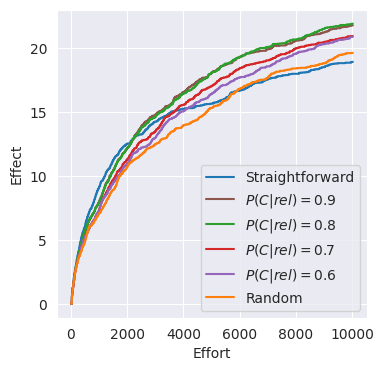

In [94]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

qrels_path = 'wtr/queries_qrels/rel_table_qrels.txt'
qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

prob_eval = {}
gain_all = {}

depth = 10
query_types = {'d2qNofeedback', 'd2qfeedback', 'gpt'}
query_type = 'd2qfeedback'
probabilities = ['rprob10nprob00','rprob09nprob03', 'rprob08nprob03', 'rprob07nprob03', 'rprob06nprob03', 'rprob05nprob05']

for probability in probabilities:

    if probability == 'rprob05nprob05':
        modality = 'random' 
    else:
        modality = 'PageTitle'

    for topic in topics_to_analyze:
        
        log_path = log_root_path+"wtr_sim-" + str(topic) + "-fixeddepthuser" + str(depth) + '-' + modality + "-" + query_type + "-" + probability + ".log"
        
        query_logs = {}
                    
        query = ''
        results = []
        
        _gain = 0
        gain = {}                
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')
                
                if len(logs) > 4 and logs[0] == 'ACTION':

                    if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                        result = logs[-1].replace("b'", "").replace("'", "").strip('\n')
                        if qrels.get((str(topic),result)):
                            _gain += int(qrels.get((str(topic),result)))
                    gain[int(logs[3])] = _gain
        gain_all[topic] = gain
    prob_eval[probability] = pd.DataFrame.from_dict(gain_all).sort_index().fillna(method='ffill').T.mean().to_dict()
pd.DataFrame.from_dict(prob_eval).sort_index().fillna(method='ffill').plot(xlabel='Effort', ylabel='Effect', figsize=(4,4))

ax = plt.gcf().axes[0]
lines = ax.get_lines()
for line in lines:
    #print(line.get_color())
    continue

lines[-1].set_color("#ff7f0e") 
lines[1].set_color("#8c564b") 


plt.legend([r'Straightforward' , r'$P(C|rel) = 0.9$', r'$P(C|rel) = 0.8$' ,  r'$P(C|rel) = 0.7$',  r'$P(C|rel) = 0.6$', 'Random'])

plt.savefig(f'figures/effort.effect.browse.{query_type}.pdf', bbox_inches="tight")
plt.show()

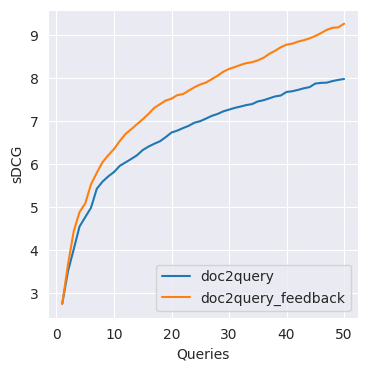

In [16]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')


def dcg(results, topic):
    _dcg = 0
    for i,result in enumerate(results):
        _doc = qrels.get((str(topic),result))
        
        if _doc is not None:
            _dcg += int(_doc) / (1 + math.log(i+1, b))

    return _dcg

b = 2
bq = 4

qrels_path = 'workspace/data/wapo/wapo_qrels'
qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

query_type_eval = {}
query_type_eval_all = {}
sdcg_eval = {}

depth = 10
query_types = ['doc2query', 'doc2query_feedback']
probability = "rprob10nprob00"

for query_type in query_types:

    if probability == 'rprob05nprob05':
        modality = 'random' 
    else:
        modality = 'PageTitle'

    for topic in topics_to_analyze:
        
        log_path = log_root_path + "wapo_sim-" + str(topic) + "-fixeddepthuser" + str(depth) +"_" + query_type + ".log"
        query_logs = {}
                    
        query = ''
        results = []
                        
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')

                if logs[1] == 'QUERY':
                    if len(query) > 0:
                        query_logs[query] = results
                    results = []
                    query = ' '.join(logs[4:]).strip('\n')
                    
                if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                    results.append(logs[-1].replace("b'", "").replace("'", "").strip('\n'))      

        sdcg = {}
        _sdcg = 0.0

        for q, query in enumerate(query_logs.keys()):
            results = query_logs.get(query)    
            _sdcg += dcg(results, topic) / (1 + math.log(q + 1, bq))
            sdcg[q+1] = _sdcg
            
        sdcg_eval[topic] = sdcg
    query_type_eval[query_type] = pd.DataFrame.from_dict(sdcg_eval)[:50].T.mean().to_dict()
    query_type_eval_all[query_type] = sdcg_eval.copy()



#print(query_type_eval.keys())
#query_type_eval['Doc2Query'] = query_type_eval.pop('d2qNofeedback')
#query_type_eval['Doc2Query Feedback'] = query_type_eval.pop('d2qfeedback')
#query_type_eval['GPT-3.5'] = query_type_eval.pop('gpt')

pd.DataFrame.from_dict(query_type_eval).plot(xlabel='Queries', ylabel='sDCG', figsize=(4,4))

#ax = plt.gcf().axes[0]
#lines = ax.get_lines()
#for line in lines:
    #print(line.get_color())
    #continue

#lines[0].set_color("#ff7f0e") 
#lines[1].set_color("#1f77b4") 

#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [1,0,2]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(f'/workspace/figures/sdcg.browse.{depth}.pdf', bbox_inches="tight")
plt.show()

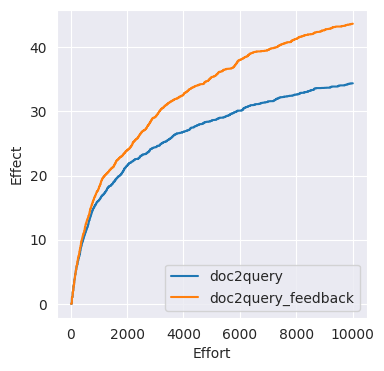

In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

qrels_path = 'workspace/data/wapo/wapo_qrels'
qrels = {}
with open(qrels_path) as f_in:
    for line in f_in.readlines():
        parts = line.split(' ')
        qrels[(parts[0],parts[2])] = parts[3]

query_type_eval = {}
gain_all = {}

depth = 10
query_types = ['doc2query', 'doc2query_feedback']
probability = "rprob10nprob00"

for query_type in query_types:

    if probability == 'rprob05nprob05':
        modality = 'random' 
    else:
        modality = 'PageTitle'

    for topic in topics_to_analyze:
        
        log_path = log_root_path + "wapo_sim-" + str(topic) + "-fixeddepthuser" + str(depth) +"_" + query_type + ".log"
        
        query_logs = {}
                    
        query = ''
        results = []
        
        _gain = 0
        gain = {}                
        with open(log_path) as f_in:

            for line in f_in.readlines():
                logs = line.split(' ')
                
                if len(logs) > 4 and logs[0] == 'ACTION':

                    if logs[1] == 'MARK' and logs[4] == 'CONSIDERED_RELEVANT':
                        result = logs[-1].replace("b'", "").replace("'", "").strip('\n')
                        if qrels.get((str(topic),result)):
                            _gain += int(qrels.get((str(topic),result)))
                    gain[int(logs[3])] = _gain
        gain_all[topic] = gain
    query_type_eval[query_type] = pd.DataFrame.from_dict(gain_all).sort_index().fillna(method='ffill').T.mean().to_dict()

#query_type_eval['Doc2Query'] = query_type_eval.pop('d2qNofeedback')
#query_type_eval['Doc2Query Feedback'] = query_type_eval.pop('d2qfeedback')
#query_type_eval['GPT-3.5'] = query_type_eval.pop('gpt')
pd.DataFrame.from_dict(query_type_eval).sort_index().fillna(method='ffill').plot(xlabel='Effort', ylabel='Effect', figsize=(4,4))

#ax = plt.gcf().axes[0]
#lines = ax.get_lines()
#for line in lines:
#    print(line.get_color())
    #continue
#pd.DataFrame.from_dict(query_type_eval).sort_index().fillna(method='ffill').plot(xlabel='Effort', ylabel='Effect', figsize=(4,4))

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])


plt.savefig(f'/workspace/figures/effort.effect.browse.{depth}.pdf', bbox_inches="tight")
plt.show()

In [ ]:
df_types = {}

for type in query_types:
    query_df = pd.DataFrame.from_dict(query_type_eval_all[type], orient="index").stack().to_frame()
    query_df = pd.DataFrame(query_df[0].values.tolist(), index=query_df.index).reset_index(names=['topic', 'query'])
    query_df = query_df.rename(columns={0: 'gain'})
    query_df = query_df[query_df.apply(lambda row: row['query'] <=50, axis=1)]
    df_types[type] = query_df

sns.lineplot(data=df_types['d2qfeedback'], x='query', y='gain', label="doc2query feedback")
sns.lineplot(data=df_types['d2qNofeedback'], x='query', y='gain',  label="doc2query no feedback")
sns.lineplot(data=df_types['gpt'], x='query', y='gain', label="gpt")
#plt.legend(loc="upper left")